# Thresholding Revisited

In [6]:
#Let us take the image that we got from OTSU and try various filters.

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/BSE_Google_noisy.jpg", 0)

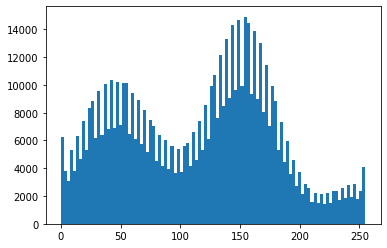

In [10]:
plt.hist(img.flat,bins=100,range=(0,255))
plt.show()

We can assihgn different values for segmentation as done previously by looking at the histogram for e.g. 100 could be one of the thershold value.

In OTSU based thresholding we don't tell where to seperate the histogram as it is an automatic thresholding. We don't need to tell where to separate the histogram, the algorithm find the optimum value.

In [6]:
ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

- The 2nd parameter in `cv2.threshold()` is put to 0 as we want to do OTSU based thresholding so we want the algorithm to look from 0 to all the way upto 255 to find optimum threshold. Had it been only a *Binary Thresholding* we would have put 100 instead of 0 because we need to explicitly tell the threshold value.


- The 3rd parameter in `cv2.threshold()` is 255, this is that value which we want to assign to all the thresholded pixels so that when we open up the image it looks like a black and white image. Black corresponding to pixels for one gray level and white corresponding to other.

- Next argument is: How to do the thresholding ?

- `ret` is the returned optimum positioned thresholding value which found by OTSU whereas `th` is the array it generates after thresholding which is nothing but our output image.

In [11]:
cv2.imshow("Original Image", img)
cv2.imshow("OTSU Image",th)
cv2.waitKey(0)          
cv2.destroyAllWindows() 

# plt.imshow(erosion)
# plt.imshow(dilation)

After comparing the the original image to the thresholded image, OTSU did quite a good job but you can see small islands of white pixels inside the black pixels. Which need to be cleaned.

# Morphological_Transformations

- After thresholding, image may contain a lot of noise which are nothing but small islands of white (or black) pixels on a fairly large area of the black (or white) pixels.

- So we generally use Erosion and Dilation after thresholding

**Erosion :** eroding i.e., removing certain pixels 

**Dilation :** dilating i.e., adding the pixels (filling the voids). After Dilation you will get rid off all the small islands of pixels in the image, as they are filled with the surrounding pixels

But how many pixels we should erode/dilute ??

Ans: It is defined by a kernel.

In [6]:
kernel = np.ones((3,3),np.uint8)   # 3x3 kernel with all ones. 
# print(kernel)

erosion = cv2.erode(th,kernel,iterations = 1)  #Erodes pixels based on the kernel defined

cv2.imshow("Original Image", img)
cv2.imshow("OTSU Image",th)
cv2.imshow("Erosion", erosion)

cv2.waitKey(0)          
cv2.destroyAllWindows() 

So erosion did a good job in the background, the isolated pixels are allcleaned up but we also added some in the white regions during the process. This happens because there were many isolated gaps (black pixels). SO now we have to dilate these pixels i.e., to fill in these gaps.

In [13]:
dilation = cv2.dilate(erosion,kernel,iterations = 1)  #Apply dilation after erosion to see the effect. 

cv2.imshow("Original Image", img)
cv2.imshow("OTSU Image",th)

cv2.imshow("Erosion + Dilation",dilation)

cv2.waitKey(0)          
cv2.destroyAllWindows() 

# plt.imshow(erosion)
# plt.imshow(dilation)

Good Job but not the best. Lets try to increase the number of iterations 

In [14]:
#playing with iterations

dilation = cv2.dilate(erosion,kernel,iterations = 2)

cv2.imshow("Original Image", img)
cv2.imshow("OTSU Image",th)

cv2.imshow("Erosion + Dilation",dilation)

cv2.waitKey(0)          
cv2.destroyAllWindows() 

Looks better now !!

---

Erosion followed by dilation can be a single operation called **opening** or `binary_opening` in skimage.

    Opening = Erosion + Dilation

**Closing** is opposite, dilation followed by erosion.

    Closing = Dilation + Erosion (i.e., First Dilation then Erosion)

In [2]:
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)  # Compare this image with the previous one


# cv2.imshow("Original Image", img)
cv2.imshow("OTSU Image",th)

cv2.imshow("Erosion + Dilation",dilation)
cv2.imshow("Opened Image",opening)


cv2.waitKey(0)          
cv2.destroyAllWindows() 

The result is an identical copy of what we did in previous cells because opening is nothing but erosion followed by dilation. So instead of doing two steps (one for erosion and one for dilation) you can do just one.

Closing is opposite i.e., Dilation followed by Erosion.

In [2]:
closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)

In [5]:
# cv2.imshow("Opening", opening)
# cv2.imshow("Closing",closing)
# cv2.waitKey(0)          
# cv2.destroyAllWindows() 

- There are many such operations such as **Morphological gradient** which is the difference between dilation and erosion of an image. 

- Another one is **Top Hat:** It is the difference between input image and Opened Image.

- **Black Hat:** It is the difference between the Closed image and input image.

In [6]:
gradient = cv2.morphologyEx(th, cv2.MORPH_GRADIENT, kernel)

# cv2.imshow("Morphological Gradient",gradient)
# cv2.waitKey(0)          
# cv2.destroyAllWindows() 

In [ ]:
tophat = cv2.morphologyEx(th, cv2.MORPH_TOPHAT, kernel)

blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

cv2.imshow("Top hat Image", tophat)
cv2.imshow("Black hat Image", blackhat)
cv2.waitKey(0)          
cv2.destroyAllWindows() 

The best way to avoid so much of complexityis to begin with an Image which is as cleaned (denoised) as possible. To compare thus you can start this section again from the beginning but use a median filter right before thresholding. You will see that onle Filtering (Denoising) + Thresholding gives a better result that of using complex morphological operations.

So does it mean that, whatever we have done in this section is waste? Naah !! If your image still contains some noise even after using the best possible filter. Morphological Operations come in to the rescue.

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/BSE_Google_noisy.jpg", 0)

median = cv2.medianBlur(img,3)

ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


cv2.imshow("Original Image", img)
cv2.imshow("Medain Image", median)
cv2.imshow("Thresholded Image",th)

cv2.waitKey(0)          
cv2.destroyAllWindows() 